In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.stats.diagnostic import normal_ad
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score

diabetes = load_diabetes()

#print (diabetes.DESCR)

tabela = pd.DataFrame(diabetes.data)
tabela.columns = diabetes.feature_names
tabela['y'] = diabetes.target

y = tabela['y']
y_treinamento = y[:-20]
y_teste = y[-20:].array.to_numpy().reshape(-1,1)

In [30]:
def resolution_RL(coluna):
    x_ = tabela[coluna]
    x_treinamento = x_[:-20].array.to_numpy().reshape(-1,1)
    x_teste = x_[-20:].array.to_numpy().reshape(-1,1)

    regr = linear_model.LinearRegression()

    regr.fit(x_treinamento, y_treinamento)
    diabetes_y_pred = regr.predict(x_teste)

    res = y_teste - diabetes_y_pred.reshape(-1,1)

    plt.hist(res)
    plt.title('Histograma dos resíduos da regressão')
    plt.show()

    p_value = normal_ad(res)[1]
    print('p-value abaixo 0.05 geralmente significa não normal:', round(p_value[0],2))
    print()
    if p_value < 0.05:
        print('Residuos não são normalmente distribuídos')
    else:
          print('Residuos são normalmente distribuídos')
    
    print('score r²', r2_score(y_teste, diabetes_y_pred))

    
    plt.scatter(y=res, x=diabetes_y_pred, color='green', s=50, alpha=.6)
    plt.hlines(y=0, xmin=-10, xmax=300, color='orange')
    plt.ylabel('$ Resíduos')
    plt.xlabel('$y Predito')
    plt.title ('Gráficos de Resíduos')
    plt.show()


Análise Individual AGE

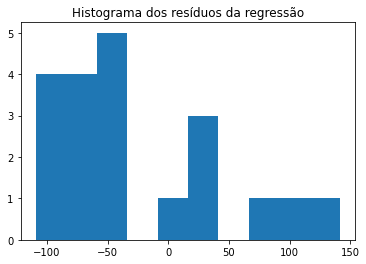

p-value abaixo 0.05 geralmente significa não normal: 0.04

Residuos não são normalmente distribuídos
score r² -0.1327020163062087


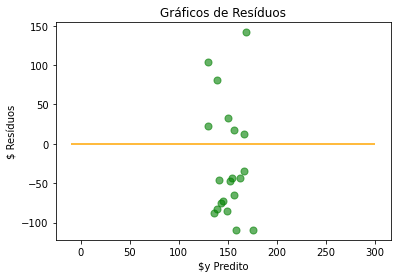

In [31]:
resolution_RL('age')

Análise Individual SEX

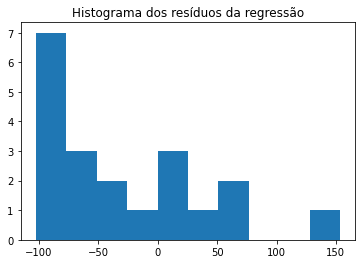

p-value abaixo 0.05 geralmente significa não normal: 0.05

Residuos são normalmente distribuídos
score r² -0.13883792137588857


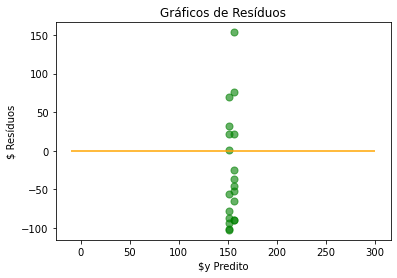

In [32]:
resolution_RL('sex')

Análise Individual BMI

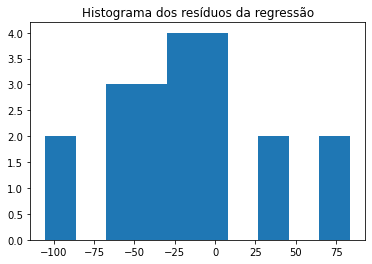

p-value abaixo 0.05 geralmente significa não normal: 0.51

Residuos são normalmente distribuídos
score r² 0.47257544798227125


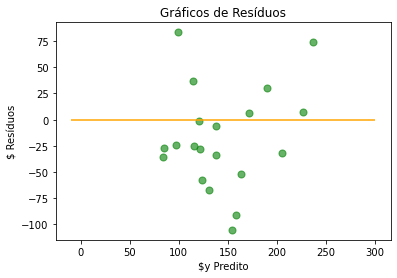

In [33]:
resolution_RL('bmi')

Análise Individual BP

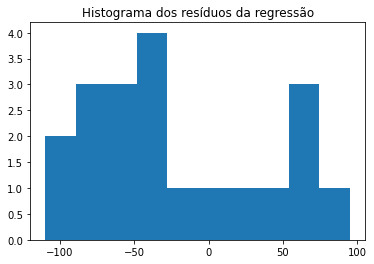

p-value abaixo 0.05 geralmente significa não normal: 0.18

Residuos são normalmente distribuídos
score r² 0.15995117339547205


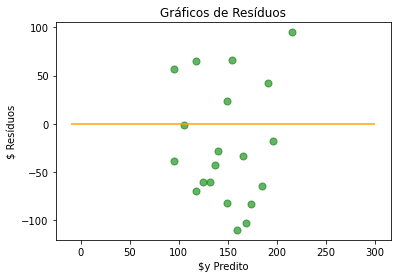

In [34]:
resolution_RL('bp')

Análise Individual s1

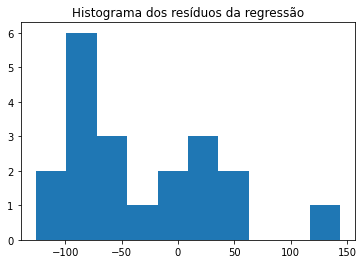

p-value abaixo 0.05 geralmente significa não normal: 0.11

Residuos são normalmente distribuídos
score r² -0.16094176987655562


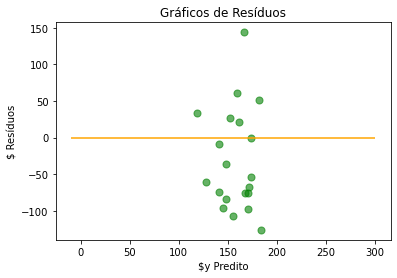

In [35]:
resolution_RL('s1')

Análise Individual s2

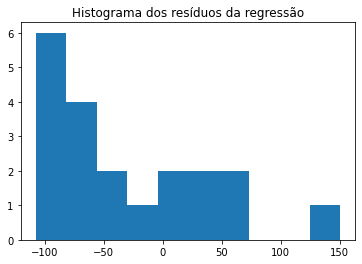

p-value abaixo 0.05 geralmente significa não normal: 0.02

Residuos não são normalmente distribuídos
score r² -0.15171870558112976


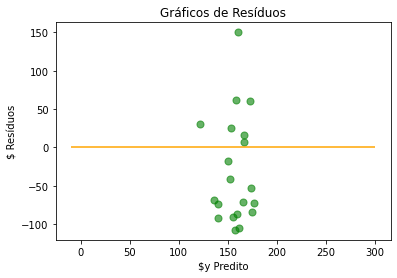

In [36]:
resolution_RL('s2')

Análise Individual s3

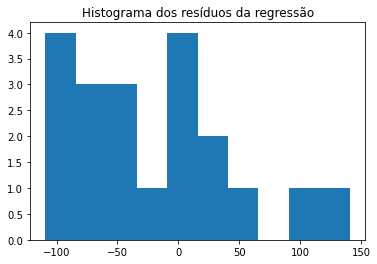

p-value abaixo 0.05 geralmente significa não normal: 0.32

Residuos são normalmente distribuídos
score r² 0.060610607792839555


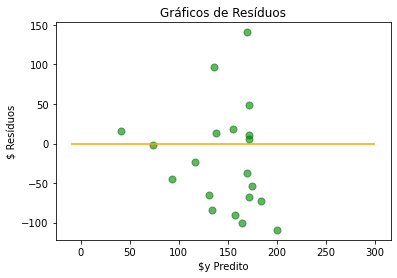

In [37]:
resolution_RL('s3')

Análise Individual s4

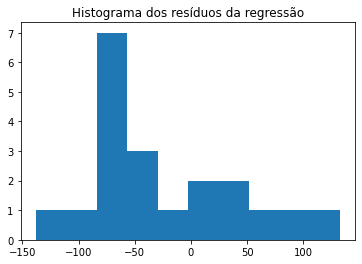

p-value abaixo 0.05 geralmente significa não normal: 0.05

Residuos são normalmente distribuídos
score r² -0.004070338973065413


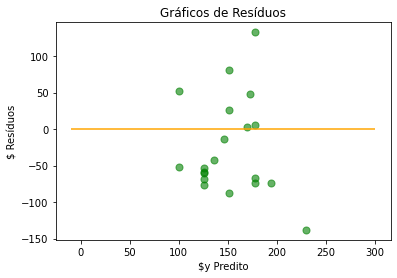

In [38]:
resolution_RL('s4')

Análise Individual s5

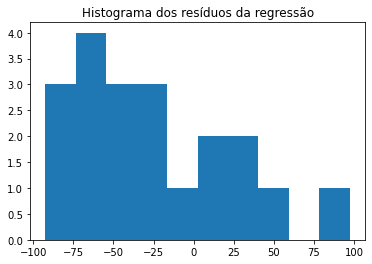

p-value abaixo 0.05 geralmente significa não normal: 0.09

Residuos são normalmente distribuídos
score r² 0.3948984231023219


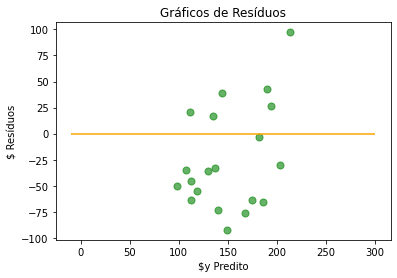

In [39]:
resolution_RL('s5')

Análise Individual s6

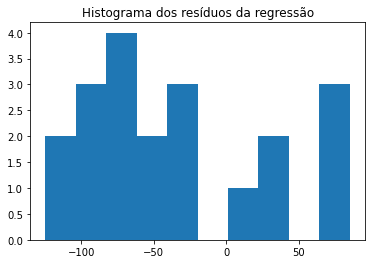

p-value abaixo 0.05 geralmente significa não normal: 0.04

Residuos não são normalmente distribuídos
score r² -0.08990371992812851


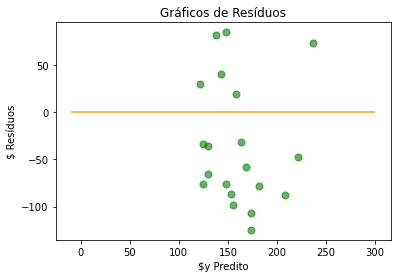

In [40]:
resolution_RL('s6')

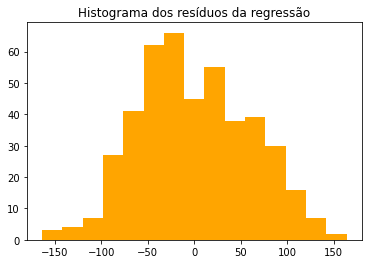

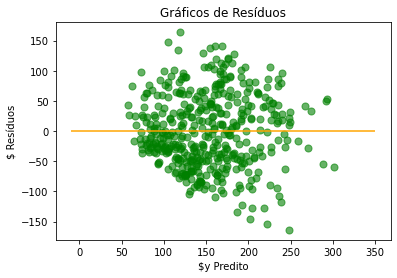

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     138.3
Date:                Wed, 14 Oct 2020   Prob (F-statistic):           2.69e-47
Time:                        20:35:47   Log-Likelihood:                -2439.2
No. Observations:                 442   AIC:                             4884.
Df Residuals:                     439   BIC:                             4897.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.879     52.846      0.0

In [41]:
Xm1 = tabela['bmi']
Xm1_treinamento = Xm1[:-20].array.to_numpy().reshape(-1,1)
Xm1_teste = Xm1[-20:].array.to_numpy().reshape(-1,1)

Xm2 = tabela['bp']
Xm2_treinamento = Xm2[:-20].array.to_numpy().reshape(-1,1)
Xm2_teste = Xm2[-20:].array.to_numpy().reshape(-1,1)

ym = tabela['y']
ym_treinamento = ym[:-20]
ym_teste = ym[-20:].array.to_numpy().reshape(-1,1)

xx = np.column_stack((tabela['bmi'], tabela['s4']))  #Agrupa as variaveis preditorass

xxm = sm.add_constant(xx, prepend=True) #Adiciona a coluna das constantes

res = sm.OLS(ym,xxm).fit() #Cria e ajusta o modelo

y_t = res.predict()
t = y - y_t

plt.hist(t, color='orange', bins=15)
plt.title('Histograma dos resíduos da regressão')
plt.show()

plt.scatter(y=t, x=y_t, color='green', s=50, alpha=.6)
plt.hlines(y=0, xmin=-10, xmax=350, color='orange')
plt.ylabel('$ Resíduos')
plt.xlabel('$y Predito')
plt.title ('Gráficos de Resíduos')
plt.show()

print (res.summary())

In [42]:
cr = tabela.corr()
print(cr)

          age       sex       bmi        bp        s1        s2        s3  \
age  1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex  0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi  0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp   0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1   0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2   0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3  -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4   0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5   0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6   0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
y    0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

           s4        s5        s6         y  
age  0.203841  0.270777  0.30